In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [42]:
#Read the dataset to python environment
data=pd.read_excel("iris (1).xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
data.shape

(150, 5)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [47]:
#Finding and filling missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [48]:
data['SL'].fillna(method='ffill',inplace=True)
data['SW'].fillna(method='ffill',inplace=True)
data['PL'].fillna(method='ffill',inplace=True)

In [49]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [50]:
#checking and handling outliers
num_columns=['SL', 'SW', 'PL', 'PW']

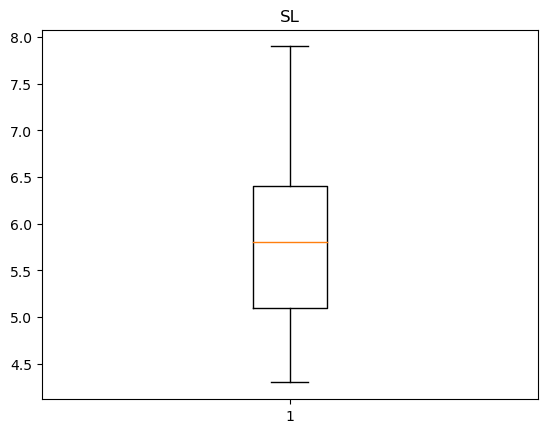

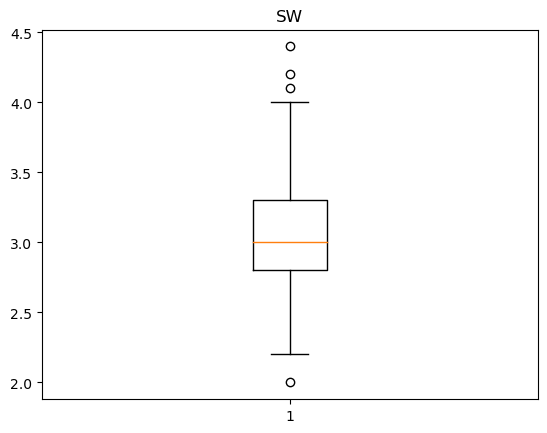

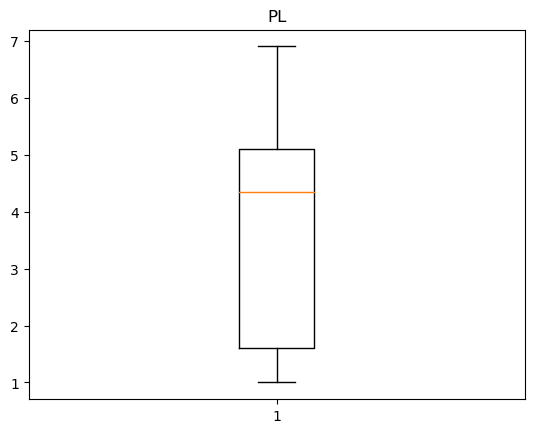

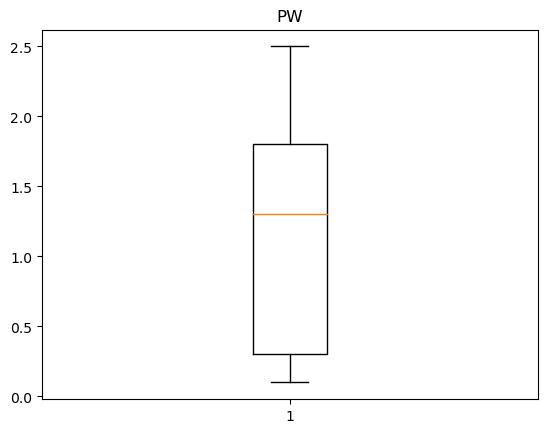

In [51]:
for i in num_columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [52]:
Q1 = np.percentile(data['SW'],25,method='midpoint')
Q2 = np.percentile(data['SW'],50,method='midpoint')
Q3 = np.percentile(data['SW'],75,method='midpoint')

In [53]:
print('Q1 is', Q1)
print('Q2 is', Q2)
print('Q3 is', Q3)

Q1 is 2.8
Q2 is 3.0
Q3 is 3.3


In [54]:
IQR =Q3 - Q1


low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('min is', low_lim)
print('max is', up_lim)

min is 2.05
max is 4.05


In [55]:
outlier = []
for x in data['SW']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)
outlier

[4.4, 4.1, 4.2, 2.0]

In [56]:
ind1=data['SW']>up_lim
data.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [57]:
ind2= data['SW']<low_lim
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [58]:
data.drop(data.loc[ind1].index,inplace=True)
data.drop(data.loc[ind2].index,inplace=True)
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.9,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le=LabelEncoder()

In [61]:
data['Classification']=le.fit_transform(data['Classification'])

In [62]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.9,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
#  Data preprocessing
# Separate features and target variable
X = data.drop("Classification", axis=1)  # Features
y = data["Classification"]  # Target variable

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
#Find out which classification model gives the best result
# Classification using various models
models = {
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Support Vector Machine (SVC)': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

best_model = None
best_accuracy = 0

In [67]:
# Iterate through each model, train, and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of {model_name}: {accuracy:.2f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

Accuracy of K-Nearest Neighbors (KNN): 0.95
Accuracy of Support Vector Machine (SVC): 0.98
Accuracy of Decision Tree: 0.95
Accuracy of Random Forest: 0.95


In [68]:
# Print the best model and its accuracy
print("\nBest Classification Model Selection:")
print(f"The best classification model is '{best_model}' with an accuracy of {best_accuracy:.2f}.")

# Justification: The best model provides the highest accuracy among the models tested.


Best Classification Model Selection:
The best classification model is 'Support Vector Machine (SVC)' with an accuracy of 0.98.
